<a href="https://colab.research.google.com/github/BhavyaManvitha-Chinni/Aquacheck/blob/main/EdaProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AQUACHECK

IMPORT DATASET

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Shape of the dataset

In [ ]:
df.shape

(3276, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [ ]:
print("duplicate rows:", df.duplicated().sum())

duplicate rows: 0


In [ ]:
print(df['Potability'].value_counts())

Potability
0    1998
1    1278
Name: count, dtype: int64


Exploratory Data Analysis (EDA)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid", palette="pastel")

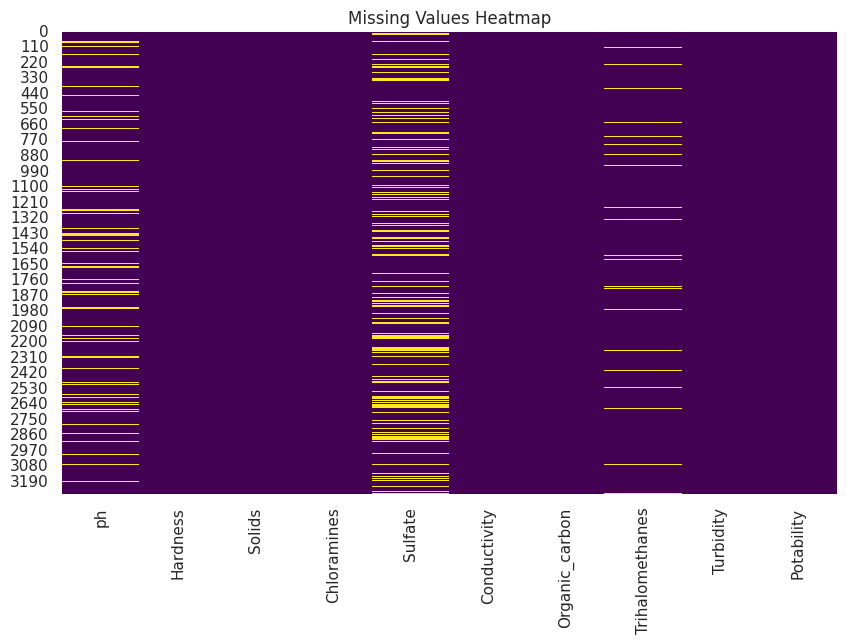


Missing values per column:

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

print("\nMissing values per column:\n")
print(df.isnull().sum())

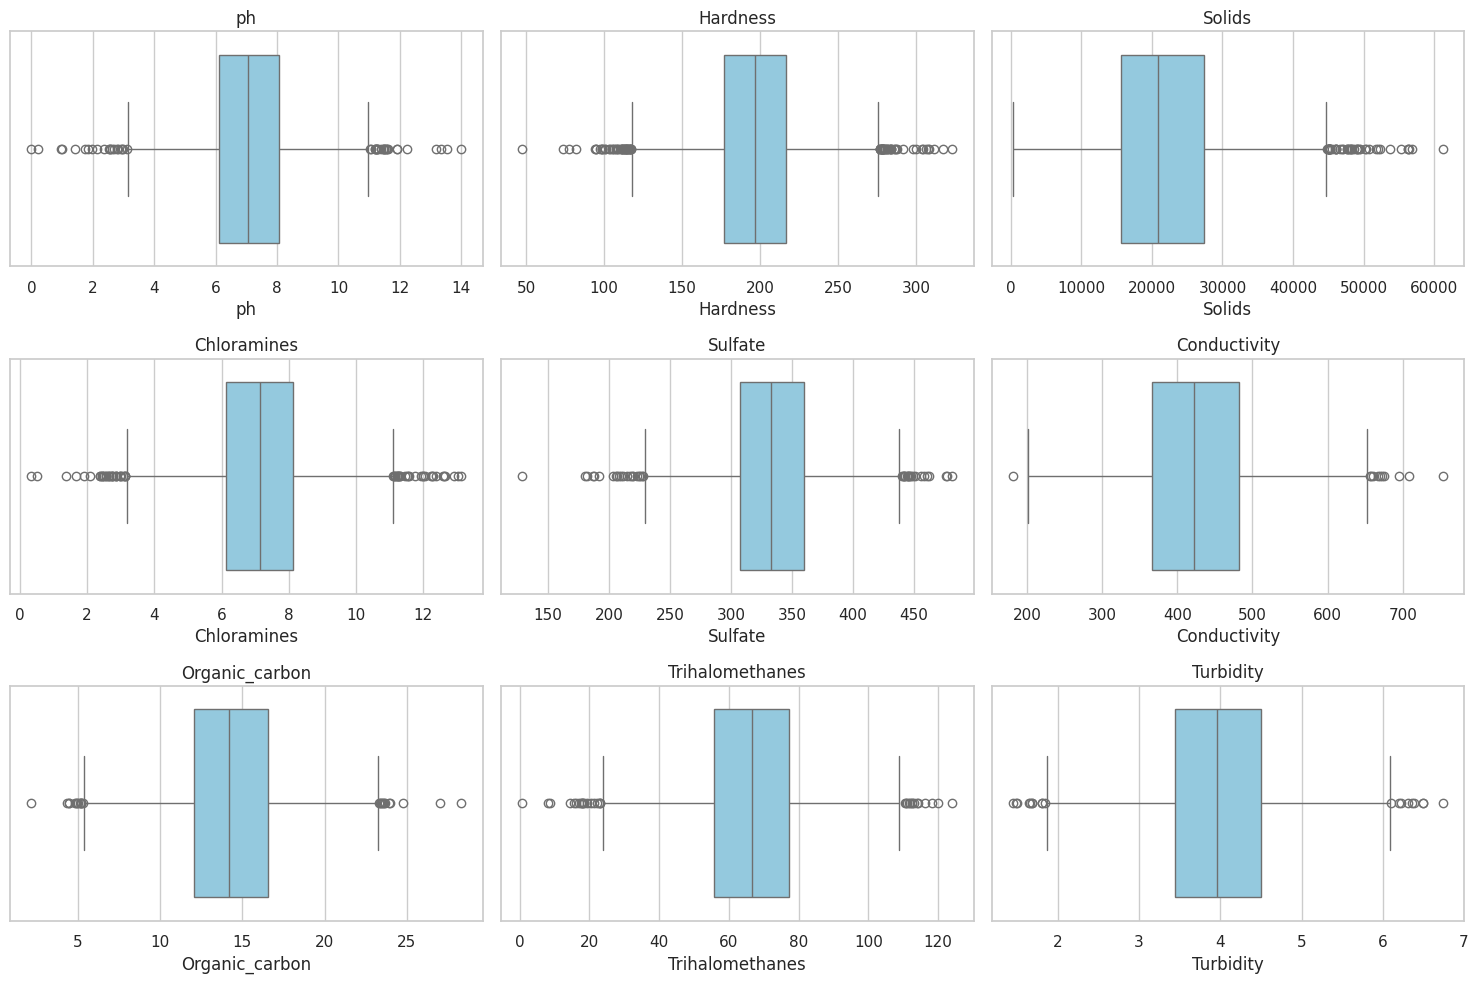

In [ ]:
features = df.columns[:-1]

plt.figure(figsize=(15,10))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()

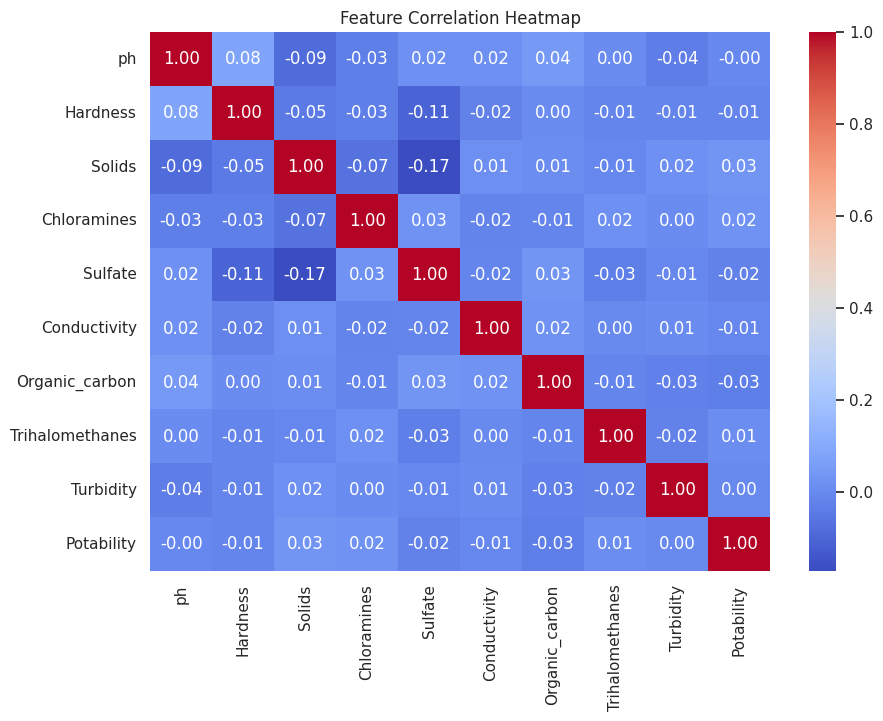

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

/tmp/ipython-input-2689694006.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Potability', data=df, palette="Set2")


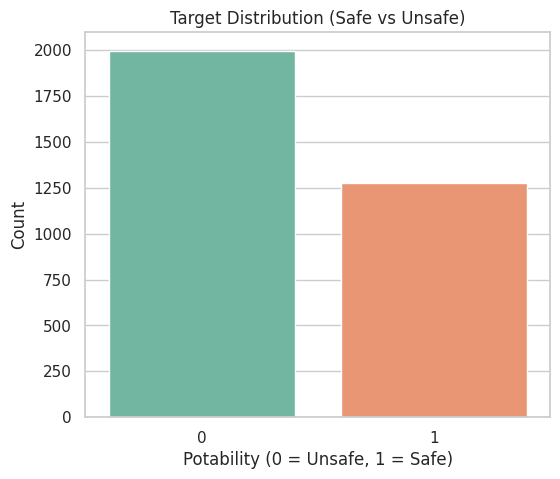

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='Potability', data=df, palette="Set2")
plt.title("Target Distribution (Safe vs Unsafe)")
plt.xlabel("Potability (0 = Unsafe, 1 = Safe)")
plt.ylabel("Count")
plt.show()

Data Preprocessing

In [ ]:
from sklearn.impute import SimpleImputer
missing_cols = ['ph', 'Sulfate', 'Trihalomethanes']
imputer = SimpleImputer(strategy='median')
df[missing_cols] = imputer.fit_transform(df[missing_cols])

print("✅ Missing values handled using median imputation.")
print(df.isnull().sum())


✅ Missing values handled using median imputation.
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [ ]:
df.describe().T[['mean', 'std', 'min', 'max']]


,mean,std,min,max
ph,7.074194,1.470040,0.000000,14.000000
Hardness,196.369496,32.879761,47.432000,323.124000
Solids,22014.092526,8768.570828,320.942611,61227.196008
Chloramines,7.122277,1.583085,0.352000,13.127000
Sulfate,333.608364,36.143851,129.000000,481.030642
Conductivity,426.205111,80.824064,181.483754,753.342620
Organic_carbon,14.284970,3.308162,2.200000,28.300000
Trihalomethanes,66.407478,15.769958,0.738000,124.000000
Turbidity,3.966786,0.780382,1.450000,6.739000
Potability,0.390110,0.487849,0.000000,1.000000


In [ ]:
df.to_csv("water_potability_clean.csv", index=False)
print("✅ Clean dataset saved as water_potability_clean.csv")


✅ Clean dataset saved as water_potability_clean.csv


Class Balance & Train/Test Split

Class counts:
 Potability
0    1998
1    1278
Name: count, dtype: int64


/tmp/ipython-input-2011583481.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Potability', data=df, palette="Set2")


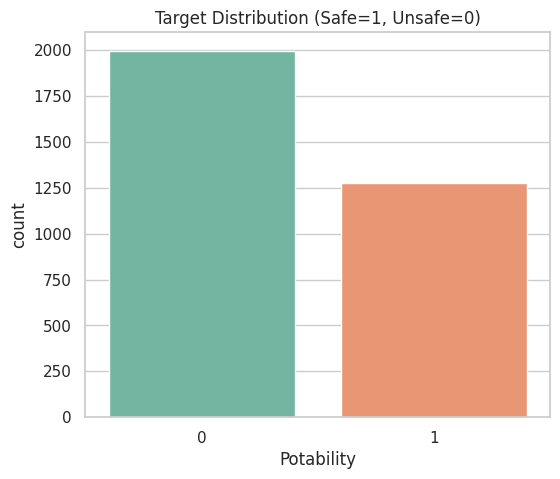

In [ ]:
class_counts = df['Potability'].value_counts()
print("Class counts:\n", class_counts)

plt.figure(figsize=(6,5))
sns.countplot(x='Potability', data=df, palette="Set2")
plt.title("Target Distribution (Safe=1, Unsafe=0)")
plt.show()

Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Potability", axis=1)
y = df["Potability"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Train/Test split complete")
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


✅ Train/Test split complete
Train shape: (2620, 9) (2620,)
Test shape: (656, 9) (656,)


I used stratified train-test split to preserve class distribution in both train and test sets. Without this, the test set may not represent the real-world balance of safe vs unsafe water.

Baseline Models

1.Logistic Regression (simple linear baseline)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Evaluate
y_pred_lr = lr.predict(X_test)
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


=== Logistic Regression ===
Accuracy: 0.6097560975609756
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

2.Random Forest (ensemble, non-linear)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Random Forest ===
Accuracy: 0.6585365853658537
              precision    recall  f1-score   support

           0       0.66      0.89      0.76       400
           1       0.63      0.30      0.41       256

    accuracy                           0.66       656
   macro avg       0.65      0.59      0.58       656
weighted avg       0.65      0.66      0.62       656



3. XGBoost (gradient boosting, often best for tabular data)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print("=== XGBoost ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:08:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost ===
Accuracy: 0.6417682926829268
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       400
           1       0.56      0.40      0.46       256

    accuracy                           0.64       656
   macro avg       0.62      0.60      0.60       656
weighted avg       0.63      0.64      0.63       656



Baseline results showed all models were biased toward unsafe water. This confirmed my suspicion from class imbalance. To correct this, I applied SMOTE to generate synthetic safe-water samples in the training set, improving recall for the minority class

Handling Class Imbalance with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_bal.value_counts().to_dict())


Before SMOTE: {0: 1598, 1: 1022}
After SMOTE: {0: 1598, 1: 1598}


In [ ]:
rf_bal = RandomForestClassifier(random_state=42)
rf_bal.fit(X_train_bal, y_train_bal)

y_pred_rf_bal = rf_bal.predict(X_test)
print("=== Random Forest (Balanced with SMOTE) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_bal))
print(classification_report(y_test, y_pred_rf_bal))


=== Random Forest (Balanced with SMOTE) ===
Accuracy: 0.6509146341463414
              precision    recall  f1-score   support

           0       0.70      0.75      0.72       400
           1       0.56      0.50      0.53       256

    accuracy                           0.65       656
   macro avg       0.63      0.62      0.63       656
weighted avg       0.65      0.65      0.65       656



In [ ]:
xgb_bal = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_bal.fit(X_train_bal, y_train_bal)

y_pred_xgb_bal = xgb_bal.predict(X_test)
print("=== XGBoost (Balanced with SMOTE) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_bal))
print(classification_report(y_test, y_pred_xgb_bal))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:10:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost (Balanced with SMOTE) ===
Accuracy: 0.600609756097561
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       400
           1       0.49      0.47      0.48       256

    accuracy                           0.60       656
   macro avg       0.58      0.58      0.58       656
weighted avg       0.60      0.60      0.60       656



After applying SMOTE, Random Forest improved Safe-water recall significantly (from 0.30 → 0.50) with balanced F1-scores. This shows class balancing is crucial for fairness in water safety predictions.

Hyperparameter Tuning

Random Forest Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

grid_rf.fit(X_train_bal, y_train_bal)

print("✅ Best Random Forest Params:", grid_rf.best_params_)
print("✅ Best F1 Score:", grid_rf.best_score_)

best_rf = grid_rf.best_estimator_


✅ Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
✅ Best F1 Score: 0.685592448540289


XGBoost Tuning

In [ ]:
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_xgb = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    xgb_params,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

grid_xgb.fit(X_train_bal, y_train_bal)

print("✅ Best XGBoost Params:", grid_xgb.best_params_)
print("✅ Best F1 Score:", grid_xgb.best_score_)

best_xgb = grid_xgb.best_estimator_


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:17:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best XGBoost Params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
✅ Best F1 Score: 0.6796475595068946


In [ ]:
# Random Forest (tuned)
y_pred_rf_tuned = best_rf.predict(X_test)
print("=== Tuned Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print(classification_report(y_test, y_pred_rf_tuned))

# XGBoost (tuned)
y_pred_xgb_tuned = best_xgb.predict(X_test)
print("=== Tuned XGBoost ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_tuned))
print(classification_report(y_test, y_pred_xgb_tuned))


=== Tuned Random Forest ===
Accuracy: 0.6585365853658537
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       400
           1       0.57      0.51      0.54       256

    accuracy                           0.66       656
   macro avg       0.64      0.63      0.63       656
weighted avg       0.65      0.66      0.65       656

=== Tuned XGBoost ===
Accuracy: 0.6234756097560976
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       400
           1       0.52      0.46      0.49       256

    accuracy                           0.62       656
   macro avg       0.60      0.59      0.60       656
weighted avg       0.62      0.62      0.62       656



In [ ]:
import numpy as np

# Utility function
def test_sample(model, sample_values, feature_names):
    """
    Test the model on a single custom sample.
    Args:
        model: trained classifier
        sample_values: list of values (in correct feature order)
        feature_names: list of feature names
    """
    sample = np.array(sample_values).reshape(1, -1)
    y_pred = model.predict(sample)[0]
    y_prob = model.predict_proba(sample)[0][y_pred] * 100

    print("🔎 Input values:")
    for name, val in zip(feature_names, sample_values):
        print(f"   {name}: {val}")

    print("\n📌 Prediction:")
    print("   Predicted Class:", "✅ Safe" if y_pred == 1 else "⚠️ Unsafe")
    print(f"   Confidence: {y_prob:.2f}%")

# -------------------------------
# Feature order reminder
# -------------------------------
feature_names = X.columns.tolist()
print("Feature order:", feature_names)

# -------------------------------
# Example 1: Custom Safe-like water sample
# -------------------------------
safe_sample = [7.2, 180, 9000, 6.5, 250, 400, 12, 75, 3.5]
print("\n=== Custom Safe-like Sample ===")
test_sample(best_rf, safe_sample, feature_names)

# -------------------------------
# Example 2: Custom Unsafe-like water sample
# -------------------------------
unsafe_sample = [4.8, 300, 43000, 2.0, 70, 720, 25, 140, 9.0]
print("\n=== Custom Unsafe-like Sample ===")
test_sample(best_rf, unsafe_sample, feature_names)


Feature order: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

=== Custom Safe-like Sample ===
🔎 Input values:
   ph: 7.2
   Hardness: 180
   Solids: 9000
   Chloramines: 6.5
   Sulfate: 250
   Conductivity: 400
   Organic_carbon: 12
   Trihalomethanes: 75
   Turbidity: 3.5

📌 Prediction:
   Predicted Class: ⚠️ Unsafe
   Confidence: 54.50%

=== Custom Unsafe-like Sample ===
🔎 Input values:
   ph: 4.8
   Hardness: 300
   Solids: 43000
   Chloramines: 2.0
   Sulfate: 70
   Conductivity: 720
   Organic_carbon: 25
   Trihalomethanes: 140
   Turbidity: 9.0

📌 Prediction:
   Predicted Class: ⚠️ Unsafe
   Confidence: 51.50%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

# Save the uncalibrated tuned RF for SHAP
with open("best_rf.pkl", "wb") as f:
    pickle.dump(best_rf, f)

print("✅ Uncalibrated RF saved as best_rf.pkl")


✅ Uncalibrated RF saved as best_rf.pkl


In [ ]:
from sklearn.calibration import CalibratedClassifierCV

# Wrap tuned Random Forest with calibration
calibrated_rf = CalibratedClassifierCV(estimator=best_rf, cv=3, method='sigmoid')
calibrated_rf.fit(X_train_bal, y_train_bal)

# Evaluate calibrated RF
from sklearn.metrics import classification_report, accuracy_score

y_pred_cal_rf = calibrated_rf.predict(X_test)
print("=== Calibrated Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_cal_rf))
print(classification_report(y_test, y_pred_cal_rf))


=== Calibrated Random Forest ===
Accuracy: 0.6524390243902439
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       400
           1       0.56      0.48      0.52       256

    accuracy                           0.65       656
   macro avg       0.63      0.62      0.62       656
weighted avg       0.65      0.65      0.65       656



In [ ]:
import pandas as pd

def test_sample(model, sample_values, feature_names):
    """
    Test calibrated model on manual input.
    """
    sample = pd.DataFrame([sample_values], columns=feature_names)
    y_pred = model.predict(sample)[0]
    y_prob = model.predict_proba(sample)[0][y_pred] * 100

    print("🔎 Input values:")
    for name, val in zip(feature_names, sample_values):
        print(f"   {name}: {val}")

    print("\n📌 Prediction:")
    print("   Predicted Class:", "✅ Safe" if y_pred == 1 else "⚠️ Unsafe")
    print(f"   Confidence: {y_prob:.2f}%")

# Test with Safe-like and Unsafe-like samples
safe_sample = [7.2, 180, 9000, 6.5, 250, 400, 12, 75, 3.5]
print("\n=== Calibrated Safe-like Sample ===")
test_sample(calibrated_rf, safe_sample, feature_names)

unsafe_sample = [4.8, 300, 43000, 2.0, 70, 720, 25, 140, 9.0]
print("\n=== Calibrated Unsafe-like Sample ===")
test_sample(calibrated_rf, unsafe_sample, feature_names)



=== Calibrated Safe-like Sample ===
🔎 Input values:
   ph: 7.2
   Hardness: 180
   Solids: 9000
   Chloramines: 6.5
   Sulfate: 250
   Conductivity: 400
   Organic_carbon: 12
   Trihalomethanes: 75
   Turbidity: 3.5

📌 Prediction:
   Predicted Class: ✅ Safe
   Confidence: 60.69%

=== Calibrated Unsafe-like Sample ===
🔎 Input values:
   ph: 4.8
   Hardness: 300
   Solids: 43000
   Chloramines: 2.0
   Sulfate: 70
   Conductivity: 720
   Organic_carbon: 25
   Trihalomethanes: 140
   Turbidity: 9.0

📌 Prediction:
   Predicted Class: ✅ Safe
   Confidence: 51.88%


In [ ]:
import pickle

with open("best_model.pkl", "wb") as f:
    pickle.dump(calibrated_rf, f)

print("✅ Final calibrated model saved as best_model.pkl")


✅ Final calibrated model saved as best_model.pkl


In [ ]:
from google.colab import files
files.download("best_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>